# RESTAURANT RECOMMENDATION

### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### READING THE DATASET

In [2]:
df = pd.read_csv('Dataset .csv')

### EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.shape

(9551, 21)

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

### CHECKING FOR NULL VALUES

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### HANDLING NULL VALUES

In [10]:
df.dropna(subset=['Cuisines'], inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### DATA VISUALIZATION

#### DENSITY PLOT

<Axes: xlabel='Aggregate rating', ylabel='Count'>

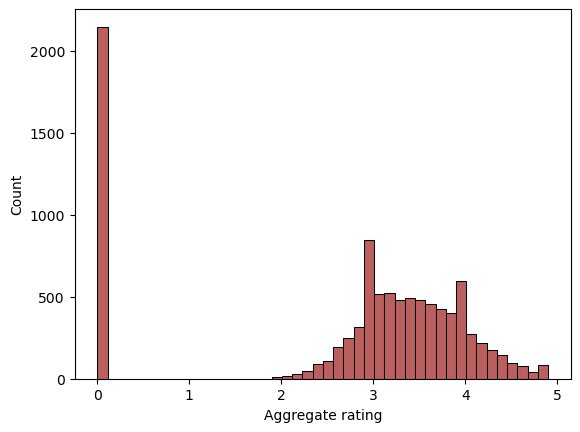

In [16]:
sns.histplot(df['Aggregate rating'], color='brown', kde_kws={'color': 'red'})

#### BAR PLOT

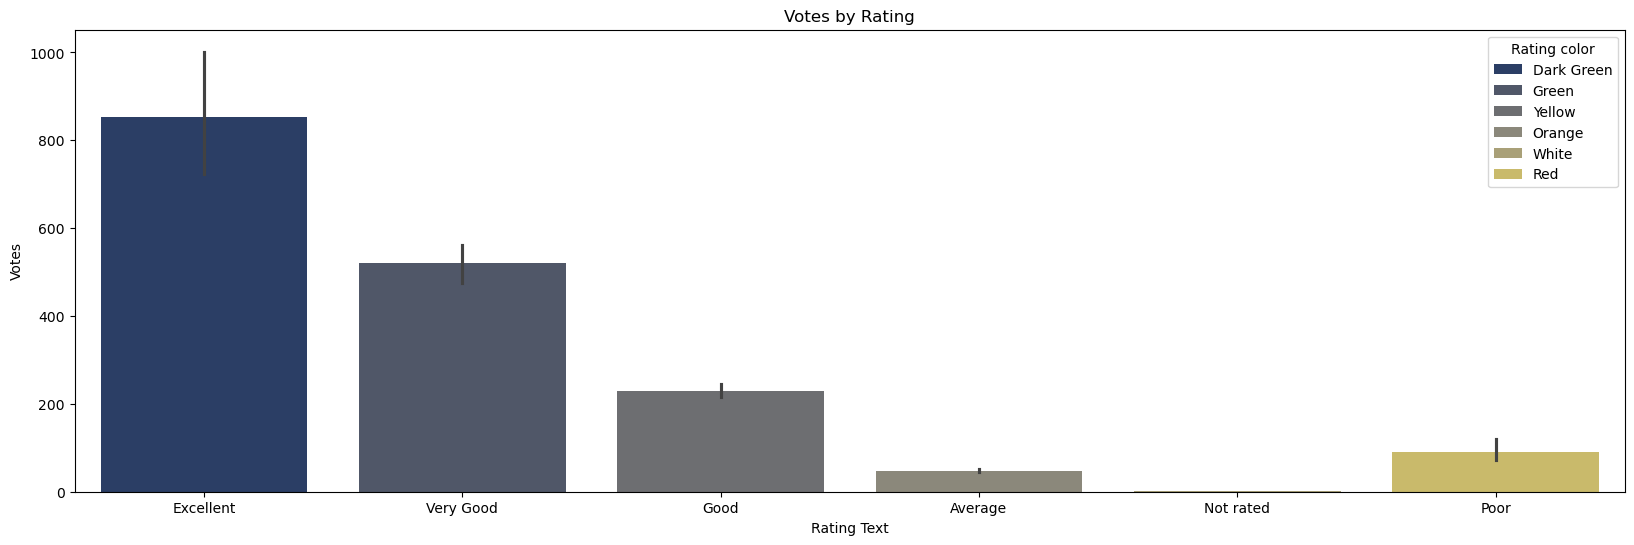

In [15]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df["Rating text"], y=df["Votes"], hue=df["Rating color"], palette="cividis")
plt.title('Votes by Rating')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.show()

#### HEATMAP

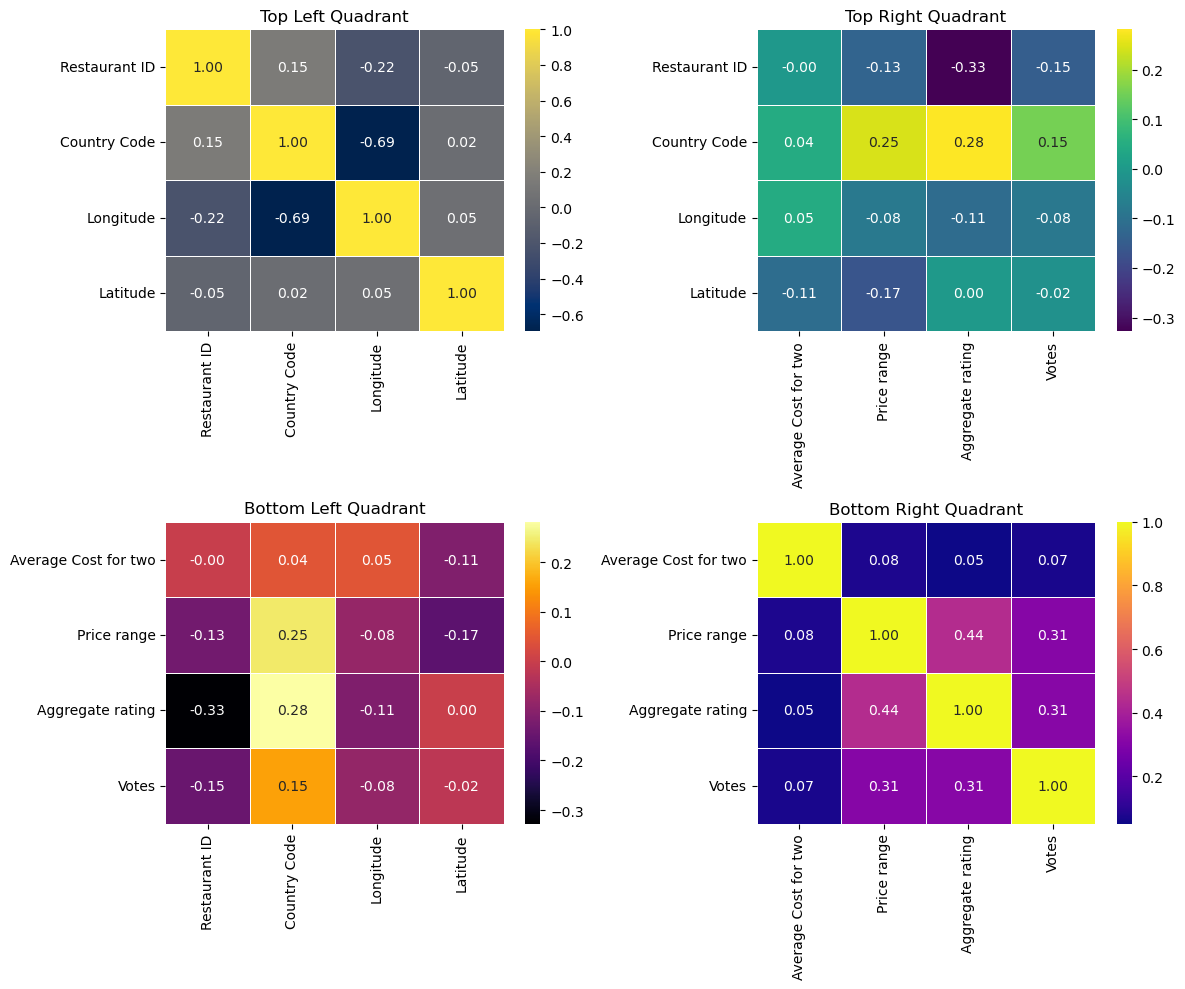

In [18]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, :len(correlation_matrix)//2], annot=True, cmap='cividis', fmt=".2f", linewidths=0.5, ax=ax[0, 0])
ax[0, 0].set_title('Top Left Quadrant')
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, len(correlation_matrix)//2:], annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, ax=ax[0, 1])
ax[0, 1].set_title('Top Right Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, :len(correlation_matrix)//2], annot=True, cmap='inferno', fmt=".2f", linewidths=0.5, ax=ax[1, 0])
ax[1, 0].set_title('Bottom Left Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, len(correlation_matrix)//2:], annot=True, cmap='plasma', fmt=".2f", linewidths=0.5, ax=ax[1, 1])
ax[1, 1].set_title('Bottom Right Quadrant')
plt.tight_layout()
plt.show()

### PREPROCESSING THE DATA

### TRANSFORMING THE DATA

In [19]:
tfidf = TfidfVectorizer(stop_words='english')
df['Cuisines'] = df['Cuisines'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['Cuisines'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### PREDICTION FUNCTION 

In [29]:
def get_recommendations(user_preferences, cosine_sim, df):
    preferred_cuisines = user_preferences.get('cuisines', [])
    preferred_price_range = user_preferences.get('price_range', None)

    filtered_indices = df.index[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in preferred_cuisines))]
    if preferred_price_range:
        filtered_indices = filtered_indices[df.loc[filtered_indices, 'Price range'] == preferred_price_range]
    sim_scores = cosine_sim[filtered_indices].sum(axis=0)
    sorted_indices = sim_scores.argsort()[::-1]
    top_indices = sorted_indices[1:4]
    return df.iloc[top_indices]

In [30]:
user_cuisines = input("Enter your preferred cuisine(s) separated by commas: ").split(',')
user_price_range = input("Enter your preferred price range (optional): ")

Enter your preferred cuisine(s) separated by commas:  Seafood
Enter your preferred price range (optional):  3


In [31]:
user_preferences = {
    'cuisines': user_cuisines,
    'price_range': int(user_price_range) if user_price_range.isdigit() else None
}
recommendations = get_recommendations(user_preferences, cosine_sim, df)

In [32]:
print(recommendations[['Restaurant Name', 'Cuisines', 'Price range']])

         Restaurant Name                                   Cuisines  \
4221  The Tangy Tomatoes  Italian, Chinese, Fast Food, North Indian   
713      Mauj Restaurant  Italian, Fast Food, North Indian, Chinese   
4443         Cafe Filter  Fast Food, Italian, North Indian, Chinese   

      Price range  
4221            1  
713             2  
4443            2  
